In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('BlackFriday.csv', usecols = ['User_ID', 'Gender', 'Age', 'Purchase'])
df_gp_1 = df[['User_ID', 'Purchase']].groupby('User_ID').agg(np.mean).reset_index()
df_gp_2 = df[['User_ID', 'Gender', 'Age']].groupby('User_ID').agg(max).reset_index()
df_gp = pd.merge(df_gp_1, df_gp_2, on = ['User_ID'])

In [3]:
df_gp.groupby(by=('Age', 'Gender')).count()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  """Entry point for launching an IPython kernel.


User_ID  Purchase
Age   Gender                   
0-17  F            78        78
      M           140       140
18-25 F           287       287
      M           782       782
26-35 F           545       545
      M          1508      1508
36-45 F           333       333
      M           834       834
46-50 F           182       182
      M           349       349
51-55 F           142       142
      M           339       339
55+   F            99        99
      M           273       273

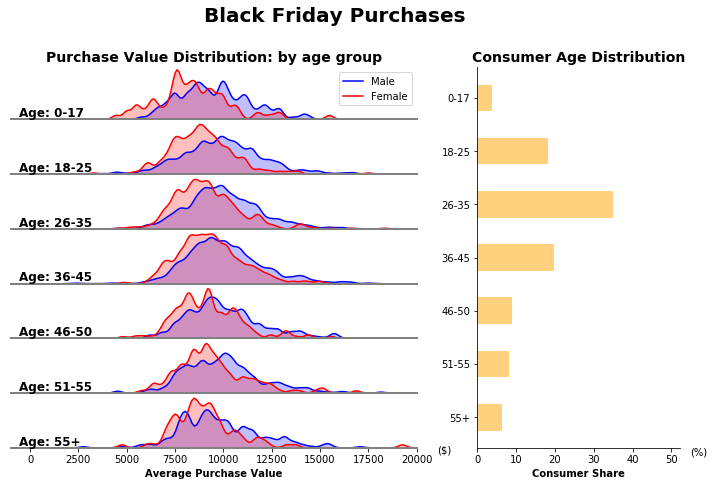

In [4]:
# freq = the percentage for each age group, and there’re in total 7 age groups.
freq = ((df_gp.Age.value_counts(normalize = True).reset_index().sort_values(by = 'index').Age)*100).tolist()
num_gp = 7

def ax_settings(ax, var_name, x_min, x_max):
    ax.set_xlim(x_min,x_max)
    ax.set_yticks([])
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_edgecolor('grey')
    ax.spines['bottom'].set_linewidth(2)
    ax.text(0.02, 0.05, var_name, fontsize=12, fontweight="bold", transform = ax.transAxes)
    return None

fig = plt.figure(figsize=(12,7))
st = fig.suptitle("Black Friday Purchases", fontsize=20, fontweight = 'bold')
# Set how the figure will be partitioned by the two plots
gs = gridspec.GridSpec(nrows=num_gp, 
                       ncols=2, 
                       figure=fig, 
                       width_ratios= [4, 2],
                       height_ratios= [1]*num_gp,
                       wspace=0.2, hspace=0.05)
ax = [None]*(num_gp + 1)
features = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

# Create a figure, partition the figure into 7*2 boxes, set up an ax array to store axes objects, 
# and create a list of age group names.  
for i in range(num_gp):
    ax[i] = fig.add_subplot(gs[i, 0])
    ax_settings(ax[i], 'Age: ' + str(features[i]), -1000, 20000)    
    sns.kdeplot(data=df_gp[(df_gp.Gender == 'M') & (df_gp.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="blue",  bw=200, legend=False)
    sns.kdeplot(data=df_gp[(df_gp.Gender == 'F') & (df_gp.Age == features[i])].Purchase, 
            ax=ax[i], shade=True, color="red",  bw=200, legend=False)
    if i < (num_gp - 1): 
        ax[i].set_xticks([])

ax[0].legend(['Male', 'Female'], facecolor='w')
ax[0].set_title("Purchase Value Distribution: by age group", fontweight = 'bold', fontsize=14)
ax[num_gp-1].set_xlabel("Average Purchase Value", fontweight="bold")
ax[num_gp-1].text(1.05, -0.1, '($)', fontsize=10, transform = ax[num_gp-1].transAxes)

# Adding the bar plot on the right. 
ax[num_gp] = fig.add_subplot(gs[:, 1])
ax[num_gp].spines['right'].set_visible(False)
ax[num_gp].spines['top'].set_visible(False)
ax[num_gp].barh(features, freq, color='orange', height=0.5, alpha = 0.5)
ax[num_gp].set_xlim(0,max(freq)*1.5)
ax[num_gp].invert_yaxis()
ax[num_gp].text(1.05, -0.02, '(%)', fontsize=10, transform = ax[num_gp].transAxes)   
ax[num_gp].tick_params(axis='y', labelsize = 10)
ax[num_gp].set_xlabel("Consumer Share", fontweight = 'bold')
ax[num_gp].set_title("Consumer Age Distribution", fontweight = 'bold', fontsize=14)

st.set_y(1)
plt.show()

### Evaluation

* **Truthful?** The data should be completely truthful, because these are real transaction data. However, one of the concerns is that we might not have a sufficiently large sample to estimate the purchase value distribution for some subgroups. For example, for females in the 0-17 and 55+ age group, there are only fewer than 100 consumers. It should cuation us whether our density distribution plot is reflective of reality.

* **Functional?** I think my plot has functioned well on what I am trying to lay out. The stack of density plots on the left are aligned well, so that readers can read clearly how the distribution differs across these age groups. Female and male purchases are also separated, so that we can see the gender gap regarding purchase behavior. These density plots were labels well with by their age groups. The histogram on the right simply portrays the distribution of customer number across these age groups. Suptitles and subtitles were used to signal the functions of the graph as a whole and what information each subplot conveys. Also, axis labels were used to signal what they mean, and their units.

* **Beutiful?**  The females were plotted in red, while the males plotted in blue, which are easily discernible. The histogram on the right were painted yellow, to distinguish from the left plots. It is hard to say that this simple plot has some admirable aesthetic properties. But I am trying to differ the colors and making them little transparent so that the plots do not look aggressive.

* **Insightful and Enlightening?** I think my visualization is insightful spontaneously by the information it is trying to convey, namely the gender gap regarding purchase behavior and the age composition. Addtionally, we can find that the patterns of gender gaps are similar across these age groups. Females' consumptions are more concentrated in the middle, while the male customers are more dispersed in terms of the purchase value. There is a slight trending that older consumers have greater consumption power. Consumer agedistributions are more geared to the middle, around 30. These results mostly conform with our general expectations. And these facts may be enlightening in way that we want to segmentize our product prices for customers, based on gender and age.

### Defense of the visualization:

The data I used is a sample of the transactions made in a retail store during the Black Friday promotion period. It is downloaded from Kaggle. What I want to reveal in these plots is: (1) what is the age composition of consumers that have purchased in Black Fridays? (2) How does the consumption of females differ from that of male consumers? To answer these questions, I've generated an array of density plots and placed them orderly. The stack of density plots in the left represents the density distribution of the average purchase value of males and females, split by age groups; The transposed histogram is the distribution of age groups. The story of the plot can be read from the above evaluation part. Both the left and right plots are meant to represent density, I used different styles though, aiming to make them look different and distinguishable. The kernel density plots used lines and the histogram used bars. I also used different colors to represent different groups, as I mentioned in the functionality. In particular, I used dollar signs($) and percent signs(%) to signal the units of the x-axis, that makes the work clear and concise.